In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
pwd%

'E:\\EDA\\House price'

In [120]:
House_Price = pd.read_csv("House_Prices.csv")

In [121]:
House_Price.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [122]:
House_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


#### The House price dataset has both Numerical and object datatypes and has 128 total entries with 8 columns

In [123]:
House_Price.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

#### The dataset do not have any missing values

In [124]:
House_Price.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


#### The column 'Home' is the count of the total number of homes. Hence it can be dropped from the further analysis. The offers is a categorical data.

### Numerical/Categorical Data segregation

In [125]:
numeric_var_names=[i for i in dict(House_Price.dtypes) if dict(House_Price.dtypes)[i] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[j for j in dict(House_Price.dtypes) if dict(House_Price.dtypes)[j] in ['object', 'O']]

In [126]:
print(numeric_var_names)
print(cat_var_names)

['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
['Brick', 'Neighborhood']


In [127]:
House_Price_Num = House_Price[numeric_var_names]

In [128]:
House_Price_Num.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [129]:
House_Price_Num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
Home         128 non-null int64
Price        128 non-null int64
SqFt         128 non-null int64
Bedrooms     128 non-null int64
Bathrooms    128 non-null int64
Offers       128 non-null int64
dtypes: int64(6)
memory usage: 6.1 KB


#### The 'Price' and 'SqFt' are continuous numerical data. Hence these are stored in 'House_Price_Num' variable

#### Though the 'Bedroom','Bathrooms' & 'Offers' are discrete numerical data they are categorical in terms of house sales.

In [130]:
House_Price_Category = House_Price[cat_var_names]
House_Price_Category.head()

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


#### The Numerical and Categorical data are segregated into two new variables 'House_Price_Num' & 'House_Price_Category'. Hence these variable are stored in 'House_Price_Category'

### Numerical Data Distribution

In [132]:
House_Price_Num.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300,1790,2,2,2
1,2,114200,2030,4,2,3
2,3,114800,1740,3,2,1
3,4,94700,1980,3,2,3
4,5,119800,2130,3,3,3


In [133]:
House_Price_Num.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


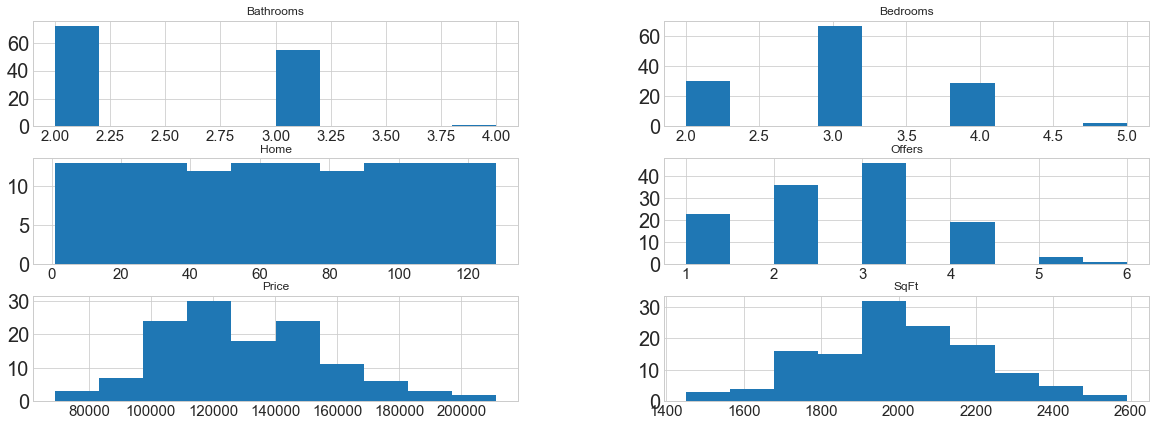

In [69]:
House_Price_Num.hist(figsize=(20,7), bins=10, xlabelsize=15, ylabelsize=20);

#### The house price data seems to be bimodal distribution. 
#### A wide range of the houses sold costed from USD 100000 to USD 150000. We have positive outliers in the price data
#### Maximum number of houses sold  has 2000 sqft area

### Outlier Treatment

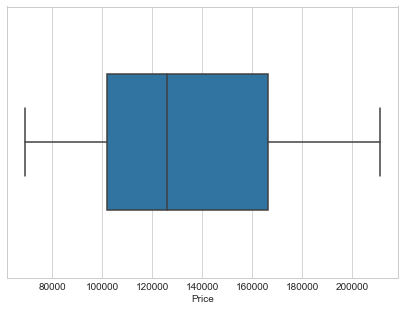

In [74]:
plt.figure(figsize = (7, 5)) 
sns.set_style("whitegrid")
sns.boxplot(House_Price_Num['Price'],width=0.5)

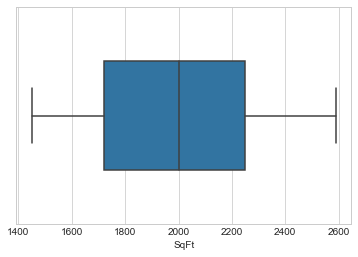

In [75]:
sns.boxplot(House_Price_Num['SqFt'],width=0.5)

#### We have a positive outlier on the Price data and outliers at both the end on SqFt data. The outliers needs to be treated

In [79]:
House_Price_Num.apply(outlier_treat).T

,Min,P1,P10,P25,P50,P75,P90,P99,Max
Home,1.000,1.10160,2.0160,13.7,64.5,115.3,126.9840,127.89840,128.000
Price,69100.000,70097.60000,79076.0000,102020.0,125950.0,166560.0,199185.2160,208938.39360,210022.080
SqFt,1456.464,1462.41088,1515.9328,1720.0,2000.0,2250.0,2521.2112,2577.05152,2583.256
Bedrooms,2.000,2.00000,2.0000,2.0,3.0,4.0,4.7840,4.97840,5.000
Bathrooms,2.000,2.00000,2.0000,2.0,2.0,3.0,3.2000,3.92000,4.000
Offers,1.000,1.00000,1.0000,1.0,3.0,4.0,5.2000,5.92000,6.000


In [134]:
House_Price_Num['Price']= House_Price_Num['Price'].clip_upper(House_Price_Num['Price'].quantile(0.99)) 
House_Price_Num['SqFt']= House_Price_Num['SqFt'].clip_lower(House_Price_Num['SqFt'].quantile(0.01))
House_Price_Num['SqFt']= House_Price_Num['SqFt'].clip_upper(House_Price_Num['SqFt'].quantile(0.99)) 
#car_sales['Sales_in_thousands'].to_csv('car_sales_1000s.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

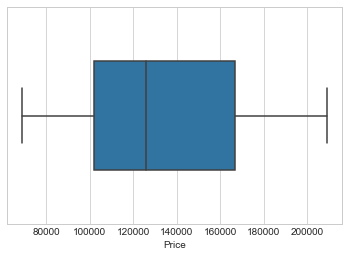

In [81]:
sns.boxplot(House_Price_Num['Price'],width=0.5)

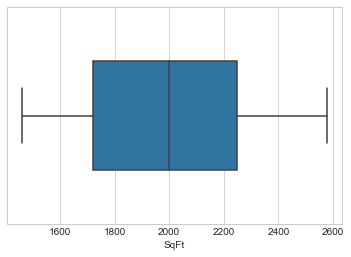

In [82]:
sns.boxplot(House_Price_Num['SqFt'],width=0.5)

#### The outliers have been clipped with the upper and lower quartiles respectively. Now we can analyse the numerical data

### Univariate Analysis


##### Numerical Data

In [83]:
House_Price_Num['Price'].describe()

count         9.000000
mean     134465.488178
std       49171.730729
min       69100.000000
25%      102020.000000
50%      125950.000000
75%      166560.000000
max      208938.393600
Name: Price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


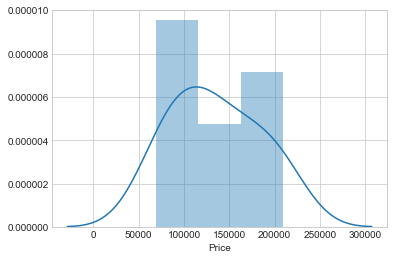

In [84]:
sns.distplot(House_Price_Num['Price'])

#### A wide range of the houses sold costed from USD 100000 to USD 150000

In [85]:
House_Price_Num['SqFt'].describe()

count       9.000000
mean     2007.329156
std       398.793211
min      1462.410880
25%      1720.000000
50%      2000.000000
75%      2250.000000
max      2577.051520
Name: SqFt, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


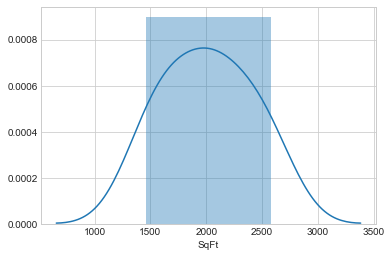

In [86]:
sns.distplot(House_Price_Num['SqFt'])

#### Maximum number of houses sold  has around 2000 sqft area.

##### Categorical Data

In [87]:
House_Price_Category.head()

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


#### Houses with 3 Bedrooms sold most. Also the sales of the houses decreasing as the bedroom count increases

In [88]:
sns.countplot(House_Price_Category['Bathrooms'],hue=House_Price_Category['Bathrooms'])

KeyError: 'Bathrooms'

#### Houses with 2 bathrooms sold most and the sales of the houses decreased as the number of the bathrooms increased

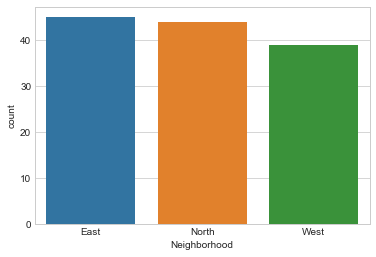

In [198]:
sns.countplot(House_Price_Category['Neighborhood'])

#### Houses present in the Eastern neighbourhood in slightly more the Northern & Western neighbourhood

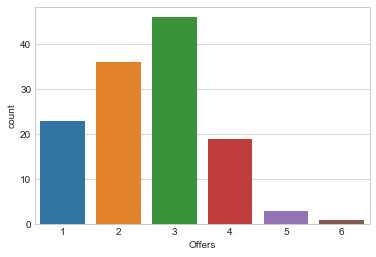

In [199]:
sns.countplot(House_Price_Category['Offers'])

#### Houses are having maximum 3 offers followed by 2 and 1 offer

### Bivariate analysis

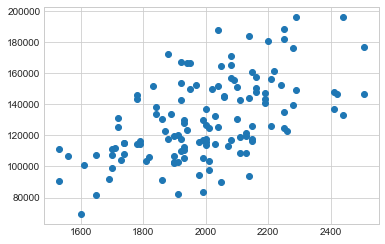

In [200]:
plt.scatter(x = 'SqFt',y = 'Price',data=House_Price_Num)

In [201]:
from scipy.stats import pearsonr
corr_1 = pearsonr(House_Price_Num['SqFt'],House_Price_Num['Price'])
corr_1

(0.552036764471571, 1.4341446198464134e-11)

#### From the above we can learn that the area of the house(Square Feet) increases the price increases. The Pearson correlelation is 0.55

#### Hence 'Sqrt' is having positive correlation with 'Price'. Lets analyse the other attributes

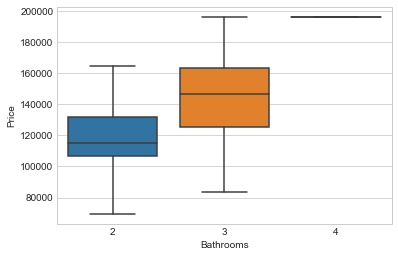

In [202]:
sns.boxplot(x = House_Price_Category['Bathrooms'],y = House_Price_Num['Price'])

#### 4 bathroom houses are more costlier than the 2 & 3 bathroom houses and they are the least sold ones
#### 2 bathroom houses are comparitively less costs than the others

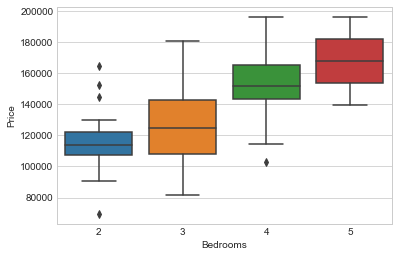

In [203]:
sns.boxplot(x = House_Price_Category['Bedrooms'],y = House_Price_Num['Price'])

#### We can see the bedroom increases and price increases.

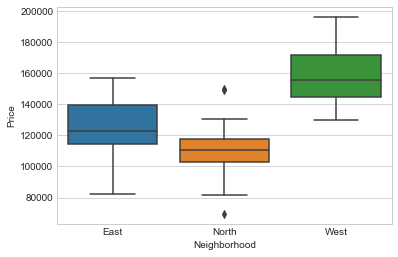

In [204]:
sns.boxplot(x = House_Price_Category['Neighborhood'],y = House_Price_Num['Price'])

#### Western Neighbourhood house prices are costlier compared to the other neighbourhoods
#### The least cost house is in the Northern Neighbourhood

## Observations from the analysis

#### A wide range of the houses sold costed from USD 100000 to USD 150000. 
#### Maximum number of houses sold  has 2000 sqft area
#### Houses with 3 Bedrooms sold most. Also the sales of the houses decreasing as the bedroom count increases
#### Houses with 2 bathrooms sold most and the sales of the houses decreased as the number of the bathrooms increased


### Handling Numerical variables

In [89]:
House_Price_Category.head()

,Brick,Neighborhood
0,No,East
1,No,East
2,No,East
3,No,East
4,No,East


In [90]:
House_Price_Category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: object(2)
memory usage: 2.1+ KB


In [135]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [136]:
House_Price_Category.dtypes

Brick           object
Neighborhood    object
dtype: object

In [137]:
for c_feature in ['Brick', 'Neighborhood']:
    House_Price_Category[c_feature] = House_Price_Category[c_feature].astype('category')
    House_Price_Category = create_dummies(House_Price_Category , c_feature)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [138]:
House_Price_Category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
Brick_Yes             128 non-null uint8
Neighborhood_North    128 non-null uint8
Neighborhood_West     128 non-null uint8
dtypes: uint8(3)
memory usage: 464.0 bytes


In [139]:
House_Price_Category.head(10)

,Brick_Yes,Neighborhood_North,Neighborhood_West
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0
6,1,0,1
7,0,0,1
8,0,0,0
9,0,0,0


In [140]:
House_Price_Num.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
0,1,114300.0,1790.0,2,2,2
1,2,114200.0,2030.0,4,2,3
2,3,114800.0,1740.0,3,2,1
3,4,94700.0,1980.0,3,2,3
4,5,119800.0,2130.0,3,3,3


In [141]:
House_Price_Num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
Home         128 non-null int64
Price        128 non-null float64
SqFt         128 non-null float64
Bedrooms     128 non-null int64
Bathrooms    128 non-null int64
Offers       128 non-null int64
dtypes: float64(2), int64(4)
memory usage: 6.1 KB


In [142]:
House_Price_Category.head()

,Brick_Yes,Neighborhood_North,Neighborhood_West
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [143]:
House_Price_new = pd.concat([House_Price_Num,House_Price_Category],axis = 1)

In [144]:
House_Price_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300.0,1790.0,2,2,2,0,0,0
1,2,114200.0,2030.0,4,2,3,0,0,0
2,3,114800.0,1740.0,3,2,1,0,0,0
3,4,94700.0,1980.0,3,2,3,0,0,0
4,5,119800.0,2130.0,3,3,3,0,0,0


In [145]:
import sklearn as sk

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [151]:
import statsmodels.formula.api as smf

In [152]:
train_data,test_data = train_test_split( House_Price_new,train_size = 0.7,
                                                  test_size = 0.3,
                                                  random_state = 1234 )

In [155]:
lm=smf.ols('Price~SqFt+Bedrooms+Bathrooms+Offers+Brick_Yes+Neighborhood_North+Neighborhood_West', train_data).fit()

In [156]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     70.54
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           8.26e-32
Time:                        17:33:43   Log-Likelihood:                -939.95
No. Observations:                  89   AIC:                             1896.
Df Residuals:                      81   BIC:                             1916.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1553.9631   1.19e+04     -0.130      0.897   -2.53e+04    2.22e+04
SqFt                  53.0006      6.953      7.623      0.000      39.166      66.835
Bedrooms            5255.3061   2009.408      2.615      0.011    1257.215    9253.397
Bathrooms           6653.4619   2538.160      2.621      0.010    1603.320    1.17e+04
Offers             -7050.3554   1177.328     -5.988      0.000   -9392.870   -4707.841
Brick_Yes            1.67e+04   2357.040      7.084      0.000     1.2e+04    2.14e+04
Neighborhood_North  1426.2456   2932.300      0.486      0.628   -4408.112    7260.603
Neighborhood_West   2.123e+04   3121.276      6.802      0.000     1.5e+04    2.74e+04
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.748
Skew:                           0.193   Prob(JB):                        0.688
Kurtosis:                       2.772   Cond. No.                     2.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""